In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read dataset
df=pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
#drop unneccessary columns
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [4]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

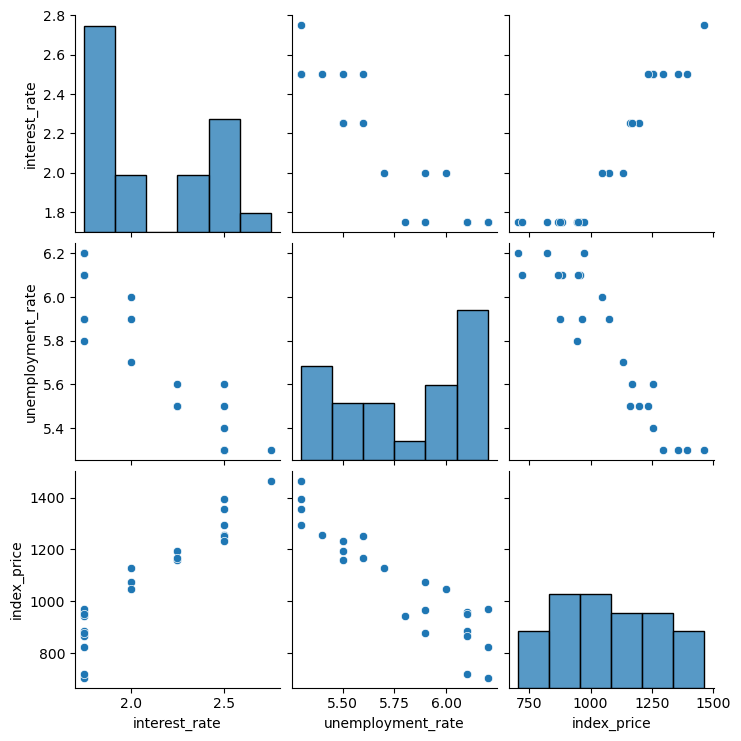

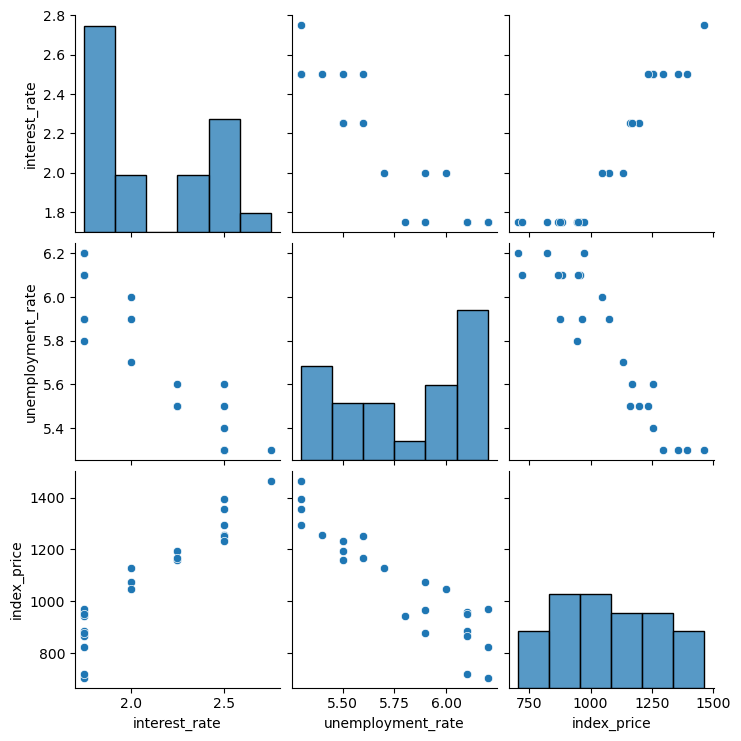

In [8]:
sns.pairplot(df)
plt.show()

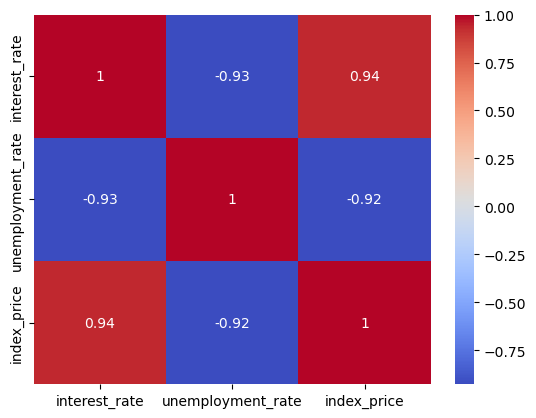

In [12]:
corr=df.corr()
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.show()


In [14]:
df.columns

Index(['interest_rate', 'unemployment_rate', 'index_price'], dtype='object')

In [15]:
#dependent and independend features 
X=df[['interest_rate','unemployment_rate']]
Y=df['index_price']

In [16]:
X.shape

(24, 2)

In [17]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

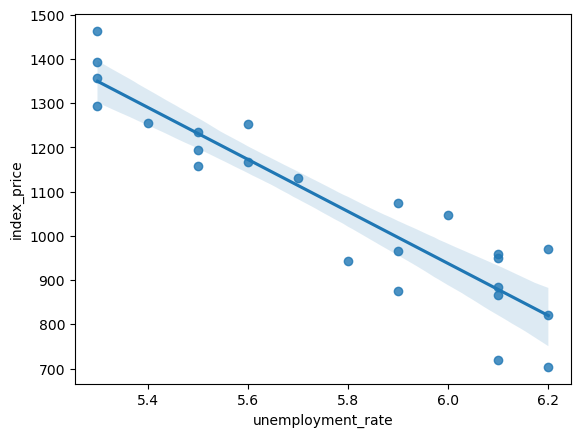

In [24]:
sns.regplot(x=df['unemployment_rate'],y=df['index_price']) #plot data and linear regression model
plt.show()

In [25]:
#standard
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,Y_train)


LinearRegression()

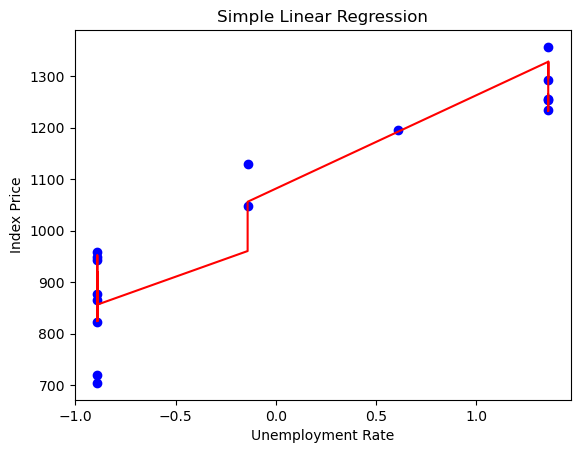

In [32]:
# Scatter: actual data
plt.scatter(X_train[:, 0], Y_train, color='blue')

# Sort X for a clean straight line
idx = np.argsort(X_train[:, 0])
X_sorted = X_train[idx, 0]
y_pred_sorted = regression.predict(X_train[idx])

# Regression line
plt.plot(X_sorted, y_pred_sorted, color='red')

plt.xlabel("Unemployment Rate")   # apna feature name daal sakta hai
plt.ylabel("Index Price")
plt.title("Simple Linear Regression")
plt.show()


In [34]:
#cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)
print(score)

[ -8717.80560752 -14492.68332185  -2542.85216034]


In [35]:
print(np.mean(score))

-8584.447029905592


In [36]:
Y_pred=regression.predict(X_test)

In [37]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
score=r2_score(Y_test,Y_pred)
print(mse)
print(mae)
print(rmse)
print(score)

5088.329958294
58.95987629034906
71.33253085580239
0.8640024299625207


In [40]:
print(regression.coef_)
print(regression.intercept_)

[  96.28689501 -101.57024663]
1037.6875


In [43]:
#OLS LINEAR
import statsmodels.api as sm
model=sm.OLS(X_train,Y_train).fit()
predict=model.predict(X_test[:,0])
#print(model.summary())

In [44]:
predict

array([[ 1.02993438e-04, -1.03242513e-04],
       [-1.50528870e-04,  1.50892904e-04],
       [ 3.56515746e-04, -3.57377931e-04],
       [-1.50528870e-04,  1.50892904e-04],
       [-2.37677164e-05,  2.38251954e-05],
       [ 1.02993438e-04, -1.03242513e-04],
       [-1.50528870e-04,  1.50892904e-04],
       [ 2.29754592e-04, -2.30310222e-04]])